# Model Development

Sekarang kita akan membangun beberapa model untuk memprediksi harga dari mobil dengan menggunakan fitur-fitur/variabel yang ada. Ini hanya estimasi tapi bisa memberi kita hasil yang objektif pada berapa harga mobil seharusnya.

Dalam analisis data kita kadang menggunakan __Model Development__ untuk membantu kita memprediksi pengamatan yang akan data dari data yang kita punya sekarang.

Sebuah model akan memberikan kita pemahaman relasi yang pasti antara variabel yang berbeda dan bagaimana variabel tersebut digunakan untuk memprediksi hasilnya.

 Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load data dan simpan dalam dataframe `df`:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dssc-unmul/data-analysis/main/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear Regression dan Multiple Linear Regression

### Linear Regression

Salah satu contoh Model Data yang akan kita gunakan adalah __Regresi Linier Sederhana__ (_Simple Linear Regression_). Simple Linear Regression adalah metode untuk membantu kita memahami hubungan antara dua variabel:

- Variabel prediktor/independen (X)
- Variabel respons/dependen (yang ingin kita prediksi)(Y)

Hasil dari Regresi Linier adalah fungsi linier yang memprediksi variabel respon (dependen) sebagai fungsi dari variabel prediktor (independen).

$$
 Y: Target \ Variable\\
 X: Prediktor \ Variabel
$$


__Fungsi Linear__

$$
\hat{Y} = a + b  X
$$

- $a$ merujuk pada __intersep__ dari garis regresi, dengan kata lain: nilai Y ketika X = 0
- $b$ merujuk pada __slope__ dari garsi regresi, dengan kata lain: nilai dimana Y berubah ketika X naik 1 unit

__Import package untuk linear regression__

In [4]:
from sklearn.linear_model import LinearRegression

__Buat object linear regression__

In [5]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__Bagaimana `highway-mpg` bisa membantu kita untuk memprediksi harga mobil?__

Untuk contoh kali ini, kita mau lihat bagaimana `highway-mpg` bisa membantu kita untuk memprediksi harga mobil. Dengan simple linear regression, kita akan buat fungsi linear dimana `highway-mpg` sebagai variabel prediktor dan `price` sebagai target nya.

In [6]:
X = df[['highway-mpg']]
Y = df['price']

Latih model dengan `highway-mpg`

In [7]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Kemudian buat prediksi

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

Nilai intersep (a)

In [9]:
lm.intercept_

38423.3058581574

Nilai slope (b)

In [10]:
lm.coef_

array([-821.73337832])

#### Apa estimasi model linear yang kita peroleh?

Seperti diatas, kita harusnya dapat fungsi linear seperti berikut:

$$
\hat{Y} = a + b  X
$$

Masukkan nilai aktual yang didapat:

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Challenge #1 a): </h1>

<b>Buat object linear regression</b>
</div>

In [11]:
# tulis jawaban dibawah


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Challenge #1 b): </h1>

<b>Latih model dengan `engine-size` sebagai variebel independen (prediktor) dan `price` sebagai dependen variabel (target)</b>
</div>

In [15]:
# tulis jawaban dibawah

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Challenge #1 c):</h1>

<b>Cetak slope dan intersep model</b>
</div>

<h4>Slope</h4>

In [1]:
# tulis jawaban dibawah


<h4>Intercept</h4>

In [2]:
# tulis jawaban dibawah


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Challenge #1 d): </h1>

<b>Bagaimana persamaan dari prediksi? Bisa gunakan x dan yhat atau `engine-size` dan `price`</b>
</div>

__double klik cell ini kemudian tulis jawaban dibawah__



### Multiple Linear Regression

Gimana kalau kita mau memprediksi harga mobil menggunakan lebih dari 1 variabel?

Kita bisa gunakan __Multiple Linear Regression__. Multiple Linear Regression mirip dengan Simple Linear Regression, tapi dengan model ini kita bisa menggunakan 2 atau lebih variabel. Banyak dari penerapan regresi di real world menggunakan lebih dari satu prediktor. Berikut contohnya:

$$
Y: \text{Variabel Target}\\
X_1 : \text{Variabel prediktor} \ 1\\
X_2: \text{Variabel prediktor} \ 2\\
X_3: \text{Variabel prediktor} \ 3\\
X_4: \text{Variabel prediktor} \ 4\\
$$

$$
a: intersep\\
b_1 : \text{koefisien variabel} \ 1\\
b_2: \text{koefisien variabel} \ 2\\
b_3: \text{koefisien variabel} \ 3\\
b_4: \text{koefisien variabel} \ 4\\
$$

Persamaannya adalah

$$
\hat{Y} = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Dari pertemuan sebelumnya kita tau bahwa variabel yang bagus untuk dijadikan prediktor dari `price` adalah:

- `horsepower`
- `curb-weight`
- `engine-size`
- `highway-mpg`

Sekarang kita coba buat model dengan variabel-variabel diatas sebagai prediktornya.

In [19]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Latih linear model dengan 4 variabel diatas

In [20]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Apa nilai intersep-nya (a)?

In [21]:
lm.intercept_

-15806.62462632922

Apa nilai koefisiennya (b1, b2, b3, b4)?

In [22]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Bagaimana bentuk persamaan linear modelnya?

Persamaan-nya adalah sebagai berikut:

$$
\hat{Y} = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Masukkan nilai yang didapat

<b>Price</b> = -15678.742628061467 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Challenge  #2 a): </h1>
Buat dan latih sebuah model multiple linear regression `lm2` dimana variabel targetnya adalah price, dan prediktornya adalah `normalized-losses` dan `highway-mpg`
</div>

In [23]:
# tulis jawban dibawah


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Challenge  #2 b): </h1>
<b>Outputkan koefisien dari model</b>
</div>

In [1]:
# tulis kode dibawah


## Model Evaluation dengan Visualisasi

Setelah membangun model, bagaimana cara mengevaluasi model kita dan bagaimana memilih yang paling bagus? Salah satu caranya adalah dengan menggunakan visualisasi.

Import package visualisasi: seaborn

In [25]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

### Regression Plot

Ketika membahas simple linear regression, cara yang paling bagus untuk memvisualisasikan model kita adalah dengan __regression plot__.

Plot ini akan menampilkan kombinasi penyebaran titik data (scatter plot), dan juga garis linear regression nya. Ini akan memberi kita estimasi yang baik dari relasi antara dua variabel, kekuatan korelasi, dan juga arahnya (relasi positif atau negatif)

Coba visualisasikan `highway-mpg` sebagai prediktor potensial dari variabel `price`:

(0.0, 48175.31672272661)

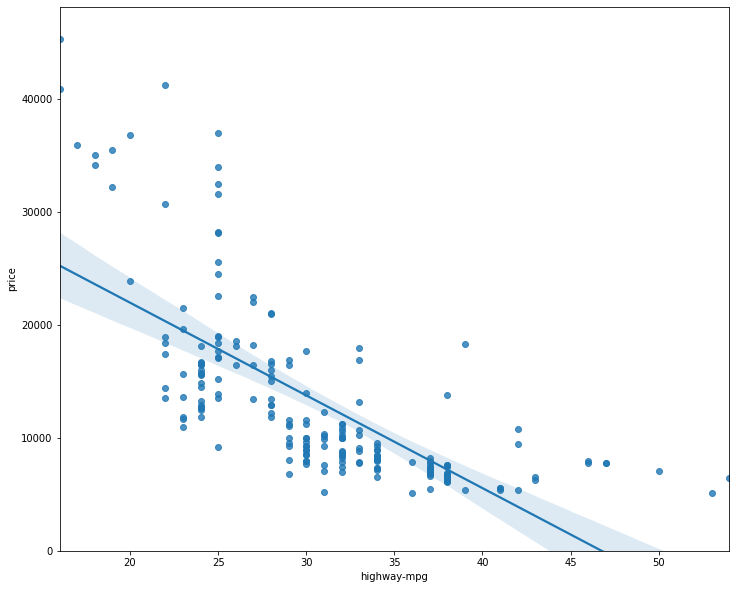

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Bisa dilihat dari plot bahwa `price` berkorelasi negative dengan `highway-mpg`, karena slope garis nya negatif. Yang perlu diingat ketika melihat regression plot adalah lihat bagaimana titik data disekitar garis regeressi. Ini akan memberikan petunjuk yang baik dari variansi data, dan apakah model linear nya bagus atau tidak. Jika datanya terlalu jauh dari garis, model ini tidak bagus untuk data. Coba bandingkan dengan regression plot dari `peak-rpm`

(0.0, 47414.1)

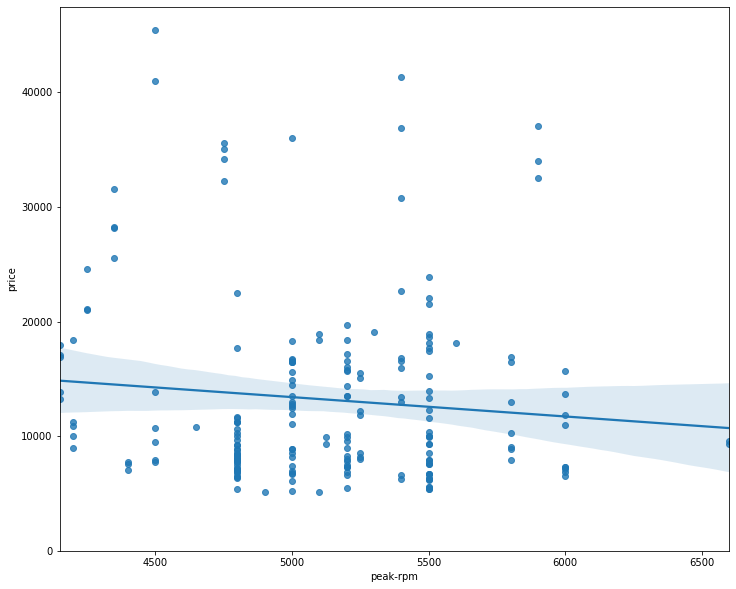

In [27]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Membandingkan regression plot dari `peak-rpm` dan `highway-mpg` kita bisa lihat bahwa titik data pada `highway-mpg` lebih dekat dengan garis regresinya. Titik data pada `peak-rpm` lebih tersebar disekitar garis regresinya, dan lebih sulit apakah titik datanya menurun atau menaik pada saat `highway-mpg` menaik.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Challenge #3:</h1>
<b>Dengan regression plot diatas `peak-rpm` atau `highway-mpg` berkorelasi lebih kuat dengan `price`. Gunakan method `.corr()` untuk memastikan jawabanmu</b>
</div>

In [2]:
# tulis jawaban dibawah


### Residual Plot

Cara yang bagus untuk memvisualisasikan variansi data adalah dengan residual plot.

Selisih antara nilai aktual (y) dan nilai terprediksi (Yhat) disebut residual (e). Ketika kita melihat regression plot, residual nya adalah jarak antara titik data dengan garis regresi. Jadi residual plot adalah grafik yang menunjukkan residual pada sumbu y vertika dan variabel indpenden pada sumbu x horizontal.

Apa yang harus diperhatikan ketika melihat residual plot? Lihat sebaran residualnya:

Jika titik data pada residual plot __tersebar secara random di sekitar sumbu x, maka linear modelnya cocok untuk data.__ Mengapa? Residual yang tersebar secara random berati variansi nya konstan, maka linear model nya cocok untuk data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


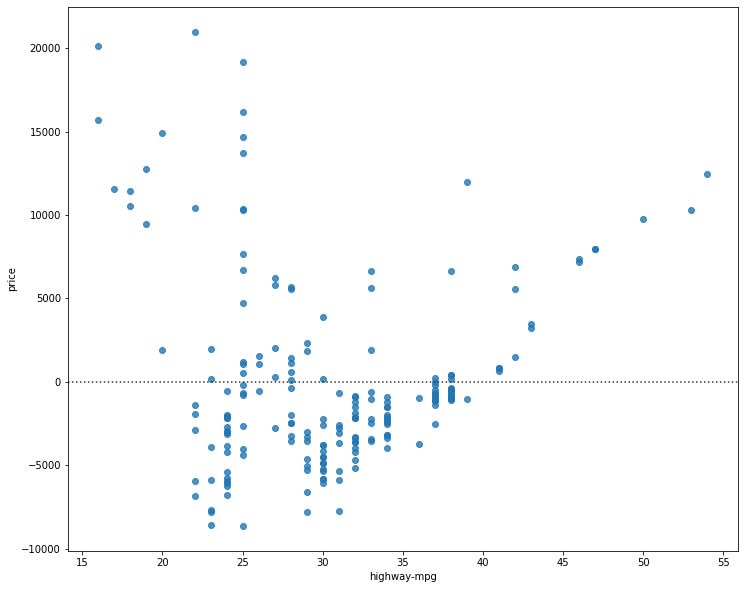

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

_Apa yang bisa didapat dari plot ini?_

Kita bisa lihat dari residual plot ini, residualnya tidak tersebar secara random disekitar sumbu x, yang berarti mungkin model non-linear lebih baik untuk data ini.

### Visualisasi Multiple Linear Regression

Bagaimana cara kita memvisualisasikan Multiple Linear Regression? Ini agak sulit karena kita tidak bisa menggunakan regression plot atau residual plot.

Salah satu caranya adalah dengan __distribution plot__: Kita bisa melihat distribusi dari nilai terprediksi yang dihasilkan dari model dibandingkan dengan distribusi dengan nilai aktual.

Kita coba buat prediksi

In [30]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


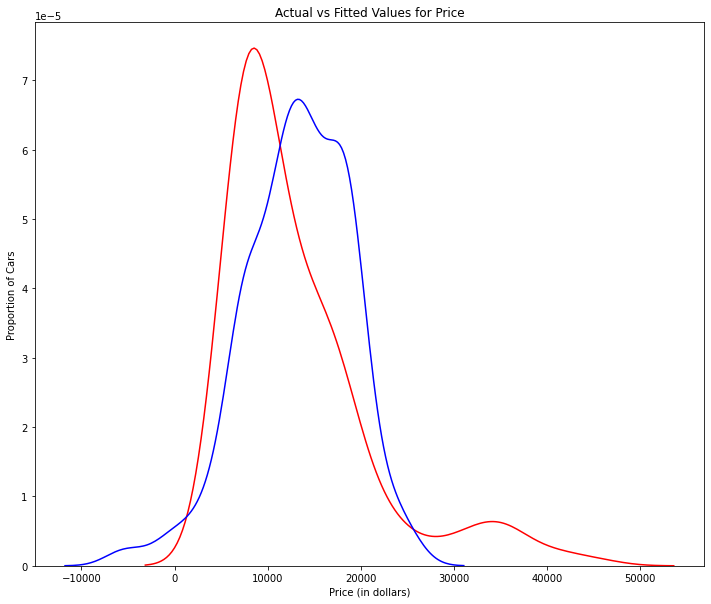

In [31]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Bisa dilihat bahwa nilai terprediksi lumayan dekat dengan nilai aktual, karena dua distribusi tersebut sedikit tumpang tindih. Namun, there is some room for improvement.

## Polynomial Regression dan Pipelines

__Polynomial regression__ adalah kejadian khusus dari linear regression biasa atau multiple linear regression. Kita mendapatkan relasi non-linear dengan cara mengkuadratkan atau memberikan derajat tinggi pada variabel prediktor. Ada derajat-derajat berbeda pada polynomial regression:

<center><b>Quadratic - derajat 2</b></center>
$$
\hat{Y} = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - derajat 3</b></center>
$$
\hat{Y} = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Derajat tinggi</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

Sebelumnya kita lihat bahwa model linear tidak memberikan hasil yang bagus saat menggunakan `highway-mpg` sebagai variabel predikotr. Mari lihat apakah kita bisa melatih model polinomial ke data.

Kita gunakan fungsi berikut untuk membuat plot data:

In [32]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Dapatkan variabel nya

In [33]:
x = df['highway-mpg']
y = df['price']

Coba ubah menjadi polinomial dengan fungsi `polyfit`, kemudian gunakan fungsi `poly1d` untuk menampilkan fungsi polynomial.

In [34]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


 Let's plot the function 

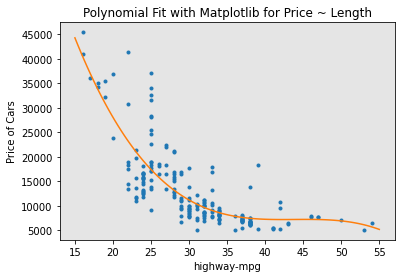

In [35]:
PlotPolly(p, x, y, 'highway-mpg')

In [36]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Kita bisa lihat dari plotting nya bahwa model polinomial lebih baik dibanding linear model. Ini karena polinomial yang dibuat lebih banyak "mengenai" titik data.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Challenge #4:</h1>
<b>Buat model polinomial derajat 11 dengan variabel x dan y diatas</b>
</div>

In [1]:
# tulis jawaban dibawah


Ekspresi matematika dari fungsi Polinomial Multivariat jadi sulit. Sebagai contoh, persamaan untuk polinomial derajat 2 dengan dua variabel adalah:

$$
\hat{Y} = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

Kita bisa transformasi polinomial pada lebih dari satu variabel. Pertama, import package:

In [38]:
from sklearn.preprocessing import PolynomialFeatures

Buat object `PolynomialFeatures` derajat 2:

In [39]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [40]:
Z_pr=pr.fit_transform(Z)

Data aslinya memiliki 201 sampel dan 4 fitur

In [41]:
Z.shape

(201, 4)

Setelah transformasi, terdapat 201 sampel dan 15 fitur

In [42]:
Z_pr.shape

(201, 15)

### Pipeline

Data pipeline menyederhanakan langkah-langkah processing data. Kita gunakan modul `Pipeline` untuk membuat pipeline. Kita juga gunakan `StandardScaler` sebagai salah satu langkah dalam pipeline.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Buat pipeline, dengan membuat _list of tuples_ yang isinya nama model atau estimator dan konstruktornya

In [44]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Kita input list tersebut sebagai argumen ke konstruktor pipeline

In [45]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Kita bisa normalisasikan data, transformasi, dan latih model sekaligus.

In [46]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Juga, kita bisa normalisasi, transformasi, dan membuat prediksi sekaligus.

In [47]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Challenge #5:</h1>
<b>Buat pipeline yang melakukan standarisasi data, kemudian melakukan prediksi menggunakan model linear regression dengan fitur Z dan target y</b>
</div>

In [2]:
# tulis jawaban dibawah


## Pengukuran Untuk Evaluasi dalam Sampel

Ketika mengevaluasi model kita, kita tidak hanya mau lihat visualisasi hasilnya, tapi juga pengukuran kuantitatifnya yang menentukan seberapa akurat modelnya.

Pengukuran yang paling sering digunakan dalam Statistika untuk mengukur akurasi model adalah:

- $R^2$ / R-Squared
- Mean Squared Error (MSE)

__R-Squared__

R squared, juga disebut dengan _coefficient of determination_, adalah ukuran untuk menunjukkan seberapa dekat data dengan garis regresi. Nilai dari R-Squared adalah persentase dari variasi dari target variabel (y), yaitu yang dapat dijelaskan dari model linear (atau juga yang dapat dijelaskan dari variabel prediktor).

__Mean Squared Error (MSE)__

MSE mengukur rata-rata dari error dipangkatkan, yaitu, selisih antara nilai aktual dan nilai estimasi (prediksi)

### Model 1: Simple Linear Regression

hitung R^2

In [51]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Kita bisa bilang bahwa ~49.659% variasi harga pada model linear ini dapat dijelaskan oleh `horsepower_fit`.

Coba hitung MSE

Kita bisa menghasilkan prediksi, "yhat", menggunakan method predict, dimana X sebagai variable input:

In [52]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Import fungsi `mean_squared_error` dari modul `metrics`

In [53]:
from sklearn.metrics import mean_squared_error

Bandingkan hasil yang diprediksi dengan nilai aktualnya

In [54]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Model 2: Multiple Linear Regression

Hitung R^2

In [55]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Kita bisa bilang bahwa ~80.896% variasi harga dapat dijelaskan oleh model multiple linear regression

Hitung MSE

Buat prediksi

In [56]:
Y_predict_multifit = lm.predict(Z)

Bandingkan hasil prediksi dengan nilai aktualnya

In [57]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Model 3: Polynomial Fit

Hitung R^2

Import fungsi `r2_score` dari modul `metrics` karena kita menggunakan fungsi yang berbeda

In [58]:
from sklearn.metrics import r2_score

Kita panggil fungsinya untuk mendapatkan nilai $R^2$

In [59]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


Bisa kita bilang bahwa ~ 67.419% variasi harga dapat dijelaskan oleh model polinomial ini

#### MSE

Kita bisa hitung MSE:

In [60]:
mean_squared_error(df['price'], p(x))

20474146.426361226

## Prediction dan Decision Making

### Prediksi

Pada bagian sebelumnya, kita melatih model dengan fungsi `fit`. Sekarang kita menggunakan method `predict` untuk membuat prediksi. Import `pyplot` untuk plotting; kita juga akan menggunakan beberapa fungsi `numpy`

In [61]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Buat input baru

In [62]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Latih modelnya

In [63]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Buat prediksi

In [64]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

Plot data

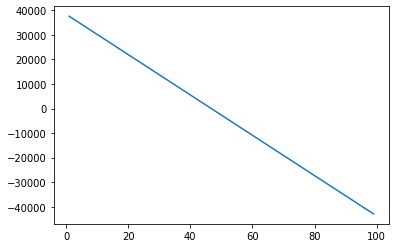

In [65]:
plt.plot(new_input, yhat)
plt.show()

### Decision Making: Menentukan Model yang Bagus

Kita telah memvisualisasikan model-model yang berbeda beserta dengan nilai R-Squared dan MSE nya. Sekarang bagaimana cara menentukan model yang bagus?

- Ketika membandingkan model, __model dengan R-Squared yang lebih tinggi, bagus__ untuk data nya.
- Ketika membandingkan model, __model dengan MSE terkecil, bagus__ untuk data nya

Coba kita lihat nilainya pada model-model yang berbeda.

- Simple linear regression: Menggunakan `highway-mpg` sebagai variabel prediktor `price`
    - R-Squared: 0.49659118843391759
    - MSE: 3.16 x10^7
- Multiple linear regression: Menggunakan `horsepower`, `curb-weight`, `engine-size`, dan `highway-mpg` sebagai variabel prediktor `price`.
    - R-Squared: 0.80896354913783497
    - MSE: 1.2 x10^7
- Polynomial fit: Menggunakan `highway-mpg` sebagai variabel prediktor `price`
    - R-Squared: 0.6741946663906514
    - MSE: 2.05 x 10^7

### Simple Linear Regression (SLR) vs Multiple Linear Regression (MLR)

Biasanya semakin banyak variabel, semakin bagus model dapat memprediksi, tapi ini tidak selalu benar. Kadang kita tidak punya cukup data, kita mungkin ketemu dengan masalah numerik, atau banyak variabel yang tidak berguna atau bahkan menjdai noise. Maka kita sebaiknya selalu cek MSE dan R^2.

Jadi supaya bisa membandingkan hasil dari model MLR vs SLR, kita dapat lihat kombinasi dari R-Squared dan MSE untuk membuat kesimpulan terbaik tentang model.

- __MSE__: MSE dari SLR adalah 3.16x10^7 sementara MSE dari MLR adalah 1.2 x10^7. MSE dari MLR lebih kecil.
- __R-Squared__: Dalam kasus ini, kita juga bisa lihat bahwa ada perbedaan besar antara R-Squared dari SLR dan R-Squared dari MLR. R-Squared dari SLR (~ 0.497) lebih kecil dibanding R-Squared dari MLR (~ 0.809).

Nilai R-Squared dengan MSE menunjukkan bahwa MLR terlihat lebih baik, dibandingkan SLR.

### Simple Linear Regression (SLR) vs Polynomial Fit

- __MSE__: Kita bisa lihat MSE polynomial fit lebih rendah daripada SLR
- __R-Squared__: R-Squared untuk polyfit lebih besar dari milik SLR

Karena polynomial fit menghasilkan MSE lebih kecil dan R-Squared lebih tinggi, kita bisa simpulkan bahwa model ini lebih bagus daripada simple linear regression.

### Multiple Linear Regression (MLR) vs Polynomial Fit

- __MSE__: MSE untuk MLR lebih kecil daripada Polynomial fit
- __R-Squared__: R-Squared untuk MLR juga lebih besar dari polynomial fit

## Kesimpulan:

Membandingkan 3 model tadi, kita simpulkan bahwa __model MLR adalah model terbaik__ untuk memprediksi harga (`price`) dari dataset kita. Hasilnya makes sense, karena kita punya total 27 variabel, dan kita tau bahwa ada potensial beberapa variabel prediktor untuk harga akhir mobil.

<h1>Thank you for completing this notebook</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">

    <p><a href="https://cocl.us/skills_network_DA0101EN_bottom"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/BottomAd.png" width="750" align="center"></a></p>
</div>


<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>, <a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan and <a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a> and <a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<p><a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a> is a Data Scientist at IBM, and holds a PhD in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.</p>

<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>